## Import Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [97]:
time_data=pd.read_csv('delivery_time.csv')
time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Understanding:

### Initial Analysis:

In [3]:
time_data.shape

(21, 2)

In [4]:
time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
time_data.describe()

### Histogram and Boxplot:

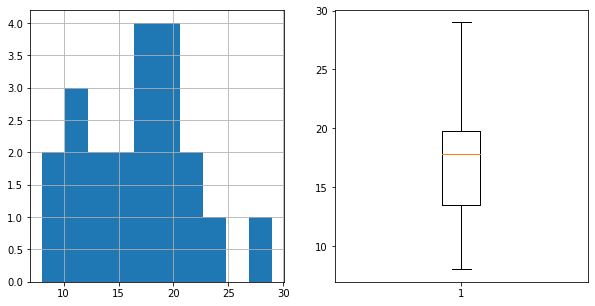

In [98]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
time_data['Delivery Time'].hist()

plt.subplot(1,2,2)
plt.boxplot(time_data['Delivery Time'])
plt.show()

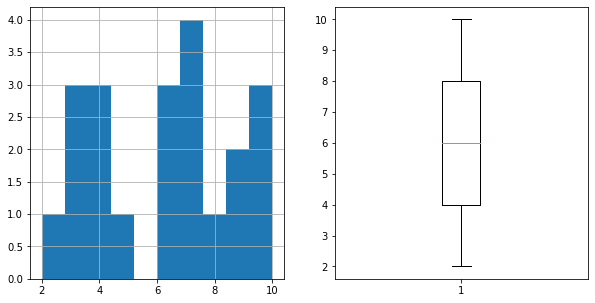

In [99]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
time_data['Sorting Time'].hist()

plt.subplot(1,2,2)
plt.boxplot(time_data['Sorting Time'])
plt.show()

### Correlation matrix:

In [100]:
time_data_cor=time_data.corr()
time_data_cor

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

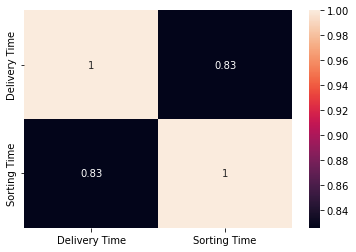

In [101]:
sns.heatmap(time_data_cor,annot=True)

### Performing Assumption Checks:

## 1.Linearity:

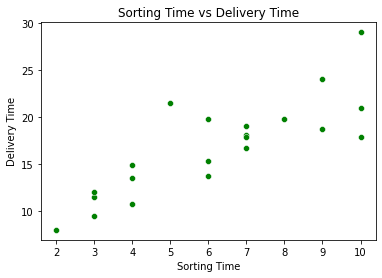

In [103]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=time_data,color='green')
plt.title('Sorting Time vs Delivery Time')
plt.show()

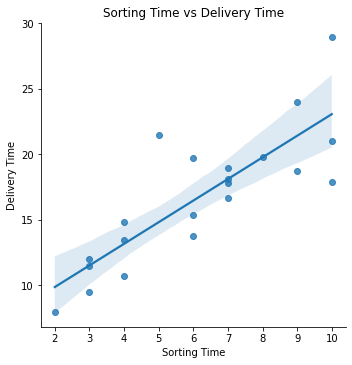

In [106]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=time_data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

## 2.Normality:

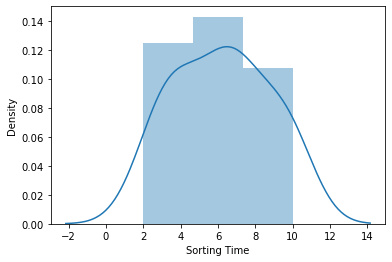

In [14]:
sns.distplot(time_data['Sorting Time'])
plt.show()

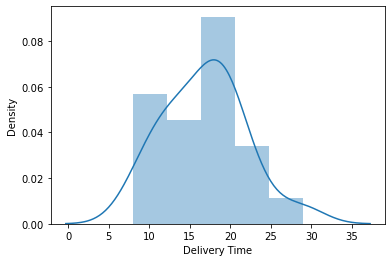

In [15]:
sns.distplot(time_data['Delivery Time'])
plt.show()

## Data Preparation:

In [108]:
#renaming the column names.
time_data=time_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
time_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Building the Model || Training The Model:

In [109]:
import statsmodels.formula.api as smf
linear_model=smf.ols(formula = 'delivery_time ~ sorting_time',data=time_data).fit()
linear_model

In [18]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        12:49:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#coefficient parameters
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
linear_model.pvalues,linear_model.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [21]:
#r_sqaured_values and adj_r_squared_values
linear_model.rsquared,linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [22]:
pred1=linear_model.predict(time_data['sorting_time'])
pred1.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

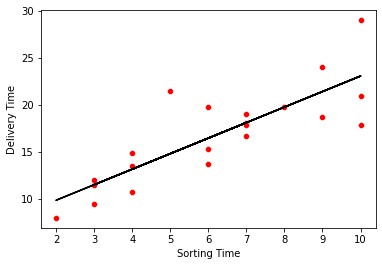

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(time_data['sorting_time'],time_data['delivery_time'],color='red')
plt.plot(time_data['sorting_time'],pred1,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [24]:
pred1.corr(time_data['delivery_time'])        #0.82 correlated

0.8259972607955325

## We will perform Data Transformations for getting improved  R-squared value.

### Logarithmic Transformations:

## 1)

In [25]:
data1=time_data

In [26]:
data1['delivery_time']=np.log(data1['delivery_time'])
data1['sorting_time']=np.log(data1['sorting_time'])

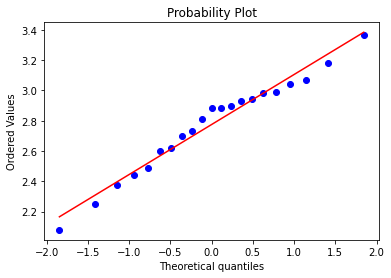

In [27]:
stats.probplot(data1['delivery_time'],dist='norm',plot=plt)
plt.show()

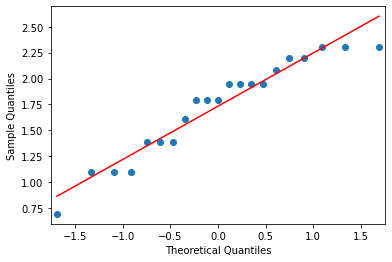

In [28]:
sm.qqplot(data1['sorting_time'],line='q')
plt.show()

In [29]:
log_model1=smf.ols('delivery_time~sorting_time',data=data1).fit()
log_model1

In [30]:
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        12:49:05   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
log_pred1=log_model1.predict(time_data['sorting_time'])
log_pred1.head()

0    3.117833
1    2.570329
2    2.812603
3    3.054878
4    3.117833
dtype: float64

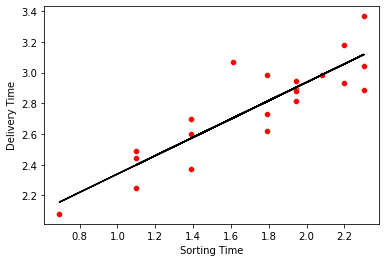

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(time_data['sorting_time'],time_data['delivery_time'],color='red')
plt.plot(time_data['sorting_time'],log_pred1,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [33]:
log_pred1.corr(time_data['delivery_time'])      #0.87 correlated

0.878727118773934

## 2)

In [34]:
data2=time_data

In [35]:
data2['delivery_time']=np.log(data2['delivery_time'])

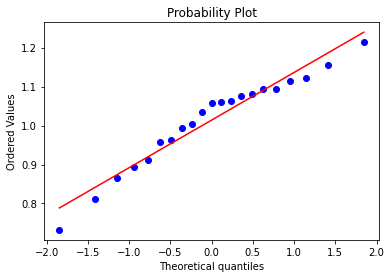

In [36]:
stats.probplot(data2['delivery_time'],dist='norm',plot=plt)
plt.show()

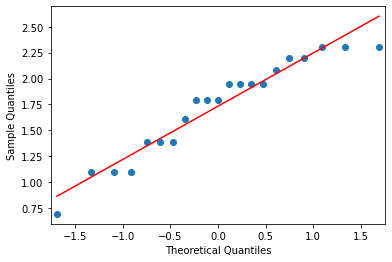

In [37]:
sm.qqplot(data2['sorting_time'],line='q')
plt.show()

In [38]:
log_model2=smf.ols('delivery_time~sorting_time',data=data2).fit()
log_model2

In [39]:
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           9.13e-08
Time:                        12:49:07   Log-Likelihood:                 31.546
No. Observations:                  21   AIC:                            -59.09
Df Residuals:                      19   BIC:                            -57.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6243      0.048     12.904      0.000       0.523       0.726
sorting_time     0.2254      0.027      8.331      0.000       0.169       0.282
==============================================================================
Omnibus:                        1.328   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.878
Skew:                           0.492   Prob(JB):                        0.645
Kurtosis:                       2.810   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
log_pred2=log_model2.predict(pd.DataFrame(time_data['sorting_time']))
log_pred2.head()

0    1.143430
1    0.936857
2    1.028267
3    1.119677
4    1.143430
dtype: float64

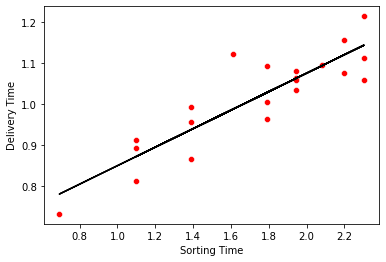

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(time_data['sorting_time'],time_data['delivery_time'],color='red')
plt.plot(time_data['sorting_time'],log_pred2,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [42]:
log_pred2.corr(time_data['delivery_time'])     #0.88 correlated

0.8860427375888225

## 3)

In [43]:
data3=time_data

In [44]:
data3['sorting_time']=np.log(data3['sorting_time'])

In [45]:
log_model3=smf.ols('delivery_time~sorting_time',data=data3).fit()
log_model3

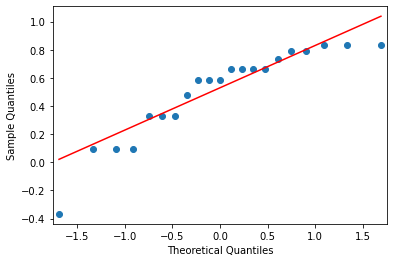

In [46]:
sm.qqplot(data3['sorting_time'],line='q')
plt.show()

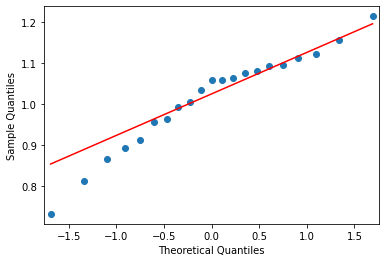

In [47]:
sm.qqplot(data3['delivery_time'],line='q')
plt.show()

In [48]:
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           4.05e-08
Time:                        12:49:09   Log-Likelihood:                 32.435
No. Observations:                  21   AIC:                            -60.87
Df Residuals:                      19   BIC:                            -58.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8447      0.023     37.344      0.000       0.797       0.892
sorting_time     0.3357      0.038      8.787      0.000       0.256       0.416
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.359
Skew:                           0.284   Prob(JB):                        0.836
Kurtosis:                       2.706   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
log_pred3=log_model3.predict(pd.DataFrame(time_data['sorting_time']))

In [50]:
log_pred3.head()

0    1.124642
1    0.954328
2    1.040447
3    1.108920
4    1.124642
dtype: float64

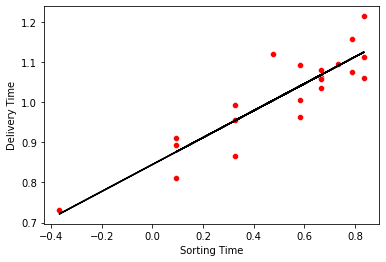

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(time_data['sorting_time'],time_data['delivery_time'],color='red')
plt.plot(time_data['sorting_time'],log_pred3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [52]:
log_pred3.corr(time_data['delivery_time'])     #0.89 correlated

0.8958289223360618

## Square Root Transformations:

## 1)

In [53]:
sq_data1=time_data

In [54]:
sq_data1['delivery_time']=np.sqrt(sq_data1['delivery_time'])
sq_data1['sorting_time']=np.sqrt(sq_data1['sorting_time'])

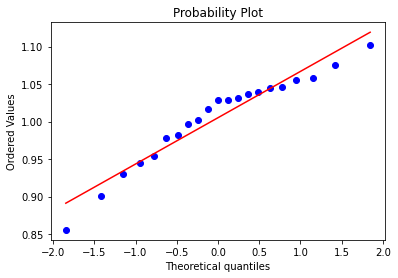

In [55]:
stats.probplot(sq_data1['delivery_time'],dist='norm',plot=plt)
plt.show()

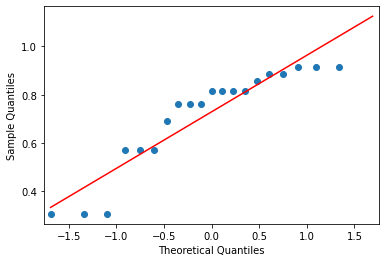

In [56]:
sm.qqplot(sq_data1['sorting_time'],line='q')
plt.show()

In [57]:
sq_model1=smf.ols('delivery_time~sorting_time',data=sq_data1).fit()
sq_model1

In [58]:
sq_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     45.85
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.42e-06
Time:                        12:49:11   Log-Likelihood:                 44.194
No. Observations:                  20   AIC:                            -84.39
Df Residuals:                      18   BIC:                            -82.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8624      0.023     37.402      0.000       0.814       0.911
sorting_time     0.2109      0.031      6.771      0.000       0.145       0.276
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.199
Skew:                           0.043   Prob(JB):                        0.905
Kurtosis:                       2.519   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
sq_pred1=sq_model1.predict(pd.DataFrame(time_data['sorting_time']))
sq_pred1.head()

0    1.055070
1    0.982990
2    1.023520
3    1.049583
4    1.055070
dtype: float64

## 2)

In [60]:
sq_data2=time_data

In [61]:
sq_data2['delivery_time']=np.sqrt(sq_data2['delivery_time'])

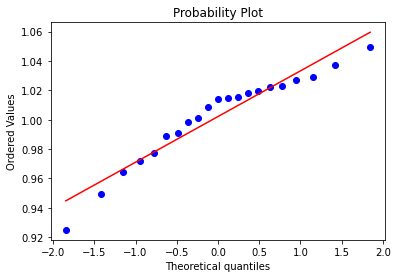

In [62]:
stats.probplot(sq_data2['delivery_time'],dist='norm',plot=plt)
plt.show()

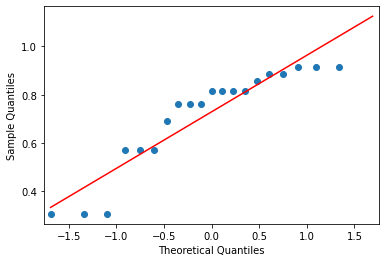

In [63]:
sm.qqplot(sq_data2['sorting_time'],line='q')
plt.show()

In [64]:
sq_model2=smf.ols('delivery_time~sorting_time',data=sq_data2).fit()
sq_model2

In [65]:
sq_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     46.70
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.14e-06
Time:                        12:49:12   Log-Likelihood:                 58.169
No. Observations:                  20   AIC:                            -112.3
Df Residuals:                      18   BIC:                            -110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9306      0.011     81.174      0.000       0.907       0.955
sorting_time     0.1058      0.015      6.834      0.000       0.073       0.138
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.198
Skew:                          -0.001   Prob(JB):                        0.906
Kurtosis:                       2.513   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
sq_pred2=sq_model2.predict(pd.DataFrame(time_data['sorting_time']))
sq_pred2.head()

0    1.027280
1    0.991110
2    1.011448
3    1.024527
4    1.027280
dtype: float64

## 3)

In [67]:
sq_data3=time_data

In [68]:
sq_data3['sorting_time']=np.sqrt(sq_data3['sorting_time'])

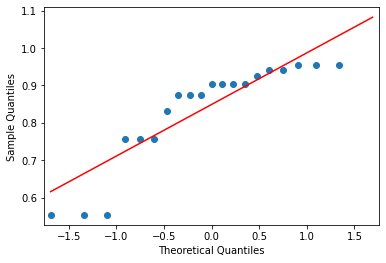

In [69]:
sm.qqplot(sq_data3['sorting_time'],line='q')
plt.show()

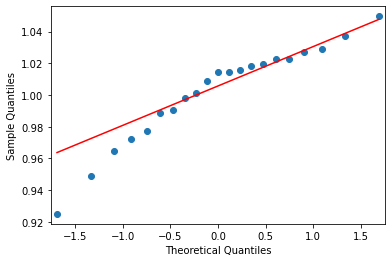

In [70]:
sm.qqplot(sq_data3['delivery_time'],line='q')
plt.show()

In [71]:
sq_model3=smf.ols('delivery_time~sorting_time',data=sq_data3).fit()
sq_model3

In [72]:
sq_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     43.44
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           3.44e-06
Time:                        12:49:13   Log-Likelihood:                 57.651
No. Observations:                  20   AIC:                            -111.3
Df Residuals:                      18   BIC:                            -109.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8741      0.020     43.132      0.000       0.832       0.917
sorting_time     0.1582      0.024      6.591      0.000       0.108       0.209
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.137
Skew:                          -0.108   Prob(JB):                        0.934
Kurtosis:                       2.657   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
sq_pred3=sq_model2.predict(pd.DataFrame(time_data['sorting_time']))
sq_pred3.head()

0    1.031767
1    1.010635
2    1.023113
3    1.030316
4    1.031767
dtype: float64

## Exponential Transformations:

## 1)

In [74]:
exp_data1=time_data

In [75]:
exp_data1['delivery_time']=np.exp(exp_data1['delivery_time'])
exp_data1['sorting_time']=np.exp(exp_data1['sorting_time'])

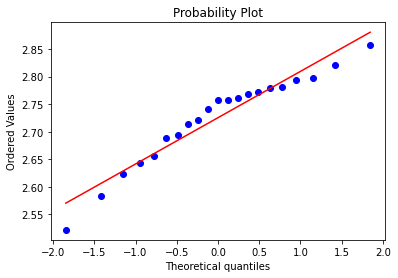

In [76]:
stats.probplot(exp_data1['delivery_time'],dist='norm',plot=plt)
plt.show()

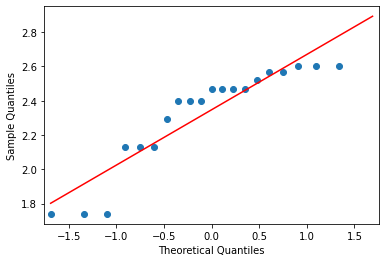

In [77]:
sm.qqplot(exp_data1['sorting_time'],line='q')
plt.show()

In [78]:
exp_model1=smf.ols('delivery_time~sorting_time',data=exp_data1).fit()
exp_model1

In [79]:
exp_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     45.16
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.67e-06
Time:                        12:49:15   Log-Likelihood:                 37.942
No. Observations:                  20   AIC:                            -71.88
Df Residuals:                      18   BIC:                            -69.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2668      0.070     32.256      0.000       2.119       2.414
sorting_time     0.2020      0.030      6.720      0.000       0.139       0.265
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.172
Skew:                           0.016   Prob(JB):                        0.918
Kurtosis:                       2.547   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
exp_pred_1=exp_model1.predict(pd.DataFrame(time_data['sorting_time']))
exp_pred_1.head()

0    2.792032
1    2.696978
2    2.750801
3    2.784881
4    2.792032
dtype: float64

## 2)

In [81]:
exp_data2=time_data

In [82]:
exp_data2['delivery_time']=np.exp(exp_data2['delivery_time'])

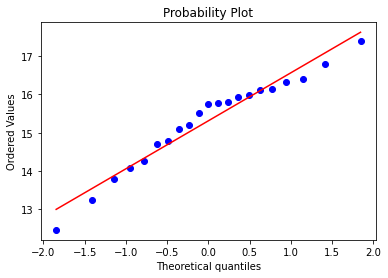

In [83]:
stats.probplot(exp_data2['delivery_time'],dist='norm',plot=plt)
plt.show()

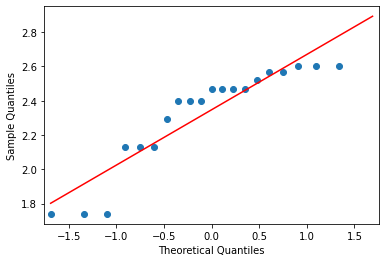

In [84]:
sm.qqplot(exp_data2['sorting_time'],line='q')
plt.show()

In [85]:
exp_model2=smf.ols('delivery_time~sorting_time',data=exp_data2).fit()
exp_model2

In [86]:
exp_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     42.47
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        12:49:16   Log-Likelihood:                -16.902
No. Observations:                  20   AIC:                             37.80
Df Residuals:                      18   BIC:                             39.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.3977      1.091      7.699      0.000       6.106      10.689
sorting_time     3.0404      0.467      6.517      0.000       2.060       4.021
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.208
Skew:                           0.144   Prob(JB):                        0.901
Kurtosis:                       2.593   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
exp_model1.predict()

array([2.79203224, 2.69697785, 2.75080085, 2.78488142, 2.79203224,
       2.75080085, 2.76524079, 2.61822807, 2.79203224, 2.78488142,
       2.77618331, 2.69697785, 2.76524079, 2.61822807, 2.61822807,
       2.69697785, 2.75080085, 2.76524079, 2.76524079, 2.73028474])

## 3)

In [88]:
exp_data3=time_data

In [89]:
exp_data3['sorting_time']=np.exp(exp_data3['sorting_time'])

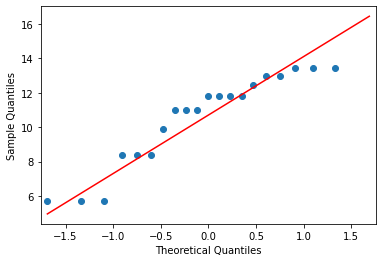

In [90]:
sm.qqplot(exp_data3['sorting_time'],line='q')
plt.show()

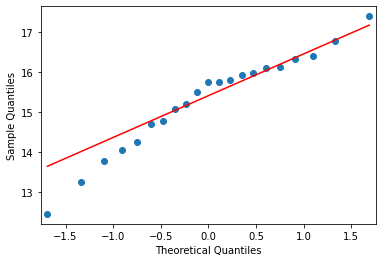

In [91]:
sm.qqplot(exp_data3['delivery_time'],line='q')
plt.show()

In [92]:
exp_model3=smf.ols('delivery_time~sorting_time',data=exp_data3).fit()
exp_model3

In [93]:
exp_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     45.82
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.43e-06
Time:                        12:49:18   Log-Likelihood:                -16.364
No. Observations:                  20   AIC:                             36.73
Df Residuals:                      18   BIC:                             38.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.8664      0.546     21.753      0.000      10.720      13.012
sorting_time     0.3397      0.050      6.769      0.000       0.234       0.445
==============================================================================
Omnibus:                        0.413   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.453
Skew:                           0.288   Prob(JB):                        0.797
Kurtosis:                       2.540   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
print('            Linear model           :', linear_model.rsquared)  

print('Logarithmic Transformation model 1 :', log_model1.rsquared)
print('Logarithmic Transformation model 2 :', log_model2.rsquared)
print('Logarithmic Transformation model 3 :', log_model3.rsquared)

print('Sqaure root Transformation model 1 :', sq_model1.rsquared)
print('Sqaure root Transformation model 2 :', sq_model2.rsquared)
print('Sqaure root Transformation model 3 :', sq_model3.rsquared)

print('Exponential Transformation model 1 :', exp_model1.rsquared)
print('Exponential Transformation model 2 :', exp_model2.rsquared)
print('Exponential Transformation model 3 :', exp_model3.rsquared)

            Linear model           : 0.6822714748417231
Logarithmic Transformation model 1 : 0.77216134926874
Logarithmic Transformation model 2 : 0.7850717328338953
Logarithmic Transformation model 3 : 0.8025094580937898
Sqaure root Transformation model 1 : 0.7180889751342441
Sqaure root Transformation model 2 : 0.721810837545503
Sqaure root Transformation model 3 : 0.7070187401761547
Exponential Transformation model 1 : 0.7149941166097002
Exponential Transformation model 2 : 0.702345407075734
Exponential Transformation model 3 : 0.7179386306143228


### Out of the above models, logarithmic model 3 is the best one , having r-sqaured value 0.802

## =======================================================================